# Research Notebook
## Jayce Scott
## Date: March 17 2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

 - Devoloped and Finalized Code for the 2 Fluid Case of the TOV Equations
 - Attended the weekly research group meeting, where we discussed the results and outlined the next steps.

## Motivation:

This week, we further optimized and developed the code for the two-fluid case of the TOV equations, bringing us one step closer to achieving the ultimate goal of our project which is to devolop a model that can generate potential signals for Dark Stars. Additionally, we met to begin preparations for the upcoming presentations, including assigning roles and duties to ensure a well-organized and effective delivery.




# 2: What? (What happened?)
## Describe what happened during your activities for the week.

This week’s focus was on finalizing and optimizing the model developed over previous weeks to simulate the mass-radius relationship of an interstellar object using the Tolman-Oppenheimer-Volkoff (TOV) equations. Specifically, we completed the two-fluid case for a bosonic star, incorporating both dark matter and ordinary matter components.

Similar to the last research journal, we defined the equations for the two-fluid case in Python, following the methodology outlined in Pitz and Schaffner-Bielich (2024). However, unlike last week, we worked entirely in SI units, as the equation of state (EoS) for ordinary matter necessitates this unit system. The equations we used can be seen and explored below.

Our code generates mass-radius curves for both the ordinary and dark matter components, along with pressure vs. radius plots to analyze the internal structure of these stars.

Additionally, we allocated presentation roles as a group. My focus will be on Explaining the accretion rate and Providing a detailed derivation of the TOV equations

These activities lay the groundwork for a more comprehensive study of relativistic objects. The equations implemented in our code for the TOV equations, as referenced in Pitz and Schaffner-Bielich (2024), are provided below.

$$
\frac{dm}{dr} = 4 \pi r^2 \epsilon
$$

and 

$$
\frac{dp}{dr} = \frac{(\epsilon + p) (m + 4 \pi r^3 p)}{r(r-2m)}
$$


with the Polytropic equation of state for Dark Matter and Ordinary Matter can be expressed, Respecutfully, as: 

$$
\epsilon(p) = \epsilon_0 \left( \frac{p}{\epsilon_0} \right)^{\frac{2}{n}} + \frac{n+2}{n-2} p
$$

$$
\epsilon(p) = \left( \frac{\gamma}{\gamma - 1} p + \left( \mu n_0 - \frac{\gamma}{\gamma - 1} p_0 \right) \left( \frac{p}{p_0} \right)^{\frac{1}{\gamma}} \right)
$$



where:

- \( p \) is the pressure,
- \( r \) is the radial coordinate,
- \( m(r) \) is the mass enclosed within radius \( r \),
- \(\epsilon\) is the initnal energy density (this is dependant on the system), 
- \( G \) is the gravitational constant,
- \( c \) is the speed of light.
- \( \epsilon(p) \) is the energy density,
- \( p \) is the pressure,
- \( \epsilon_0 \) is a constant energy density parameter,
- \( n \) is the polytropic index
- \( p_0  \) is the chemical potential 
- \( gamma  \) is the stiffness
- \( n_0) \) is the Number Density 



The code for this week can be found below: 

C:\Users\12897\AppData\Local\Temp/ipykernel_18744/2745806884.py:53: RuntimeWarning: invalid value encountered in double_scalars
  return (p/e_o1)**(2 / n) + ((n + 2) / (n - 2)) * (p/e_o1)
C:\Users\12897\AppData\Local\Temp/ipykernel_18744/2745806884.py:53: RuntimeWarning: invalid value encountered in double_scalars
  return (p/e_o1)**(2 / n) + ((n + 2) / (n - 2)) * (p/e_o1)
C:\Users\12897\AppData\Local\Temp/ipykernel_18744/2745806884.py:53: RuntimeWarning: invalid value encountered in double_scalars
  return (p/e_o1)**(2 / n) + ((n + 2) / (n - 2)) * (p/e_o1)
C:\Users\12897\AppData\Local\Temp/ipykernel_18744/2745806884.py:53: RuntimeWarning: invalid value encountered in double_scalars
  return (p/e_o1)**(2 / n) + ((n + 2) / (n - 2)) * (p/e_o1)
C:\Users\12897\AppData\Local\Temp/ipykernel_18744/2745806884.py:53: RuntimeWarning: invalid value encountered in double_scalars
  return (p/e_o1)**(2 / n) + ((n + 2) / (n - 2)) * (p/e_o1)
C:\Users\12897\AppData\Local\Temp/ipykernel_18744/2745806884

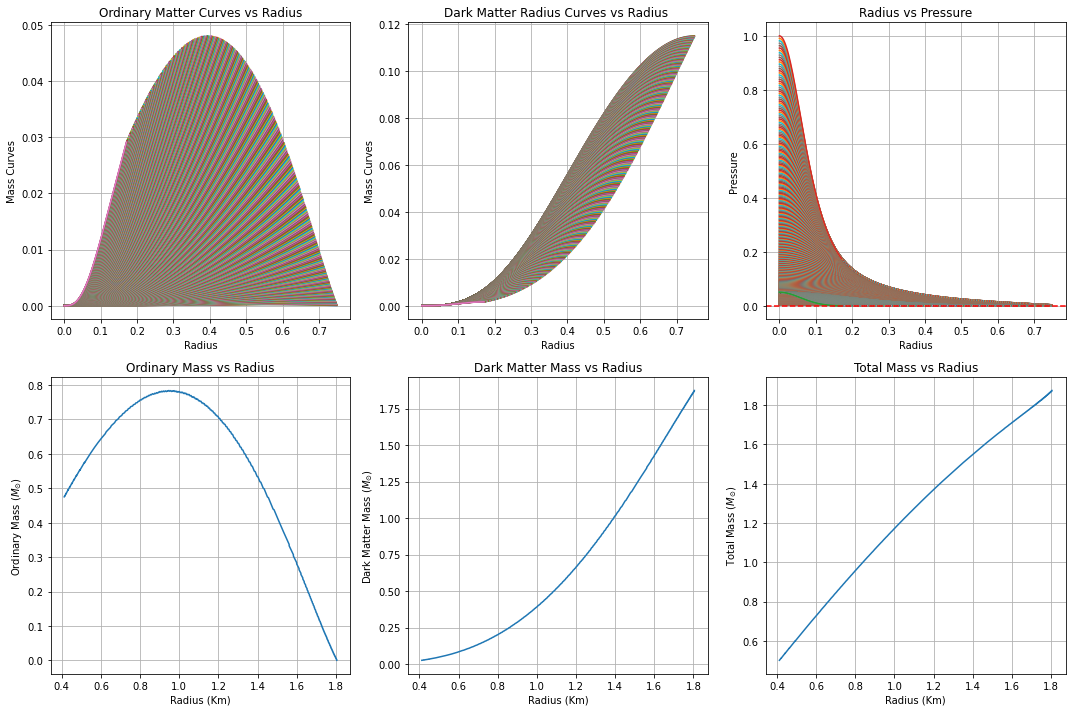

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define constants
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2x3 grid

masslist_DM = []
masslist_OM = []
radiuslist = []
masslist_tot = []

m_OM_solar_mass_list = []  # Store converted ordinary mass values
m_DM_solar_mass_list = []  # Store converted dark matter mass values
m_tot_solar_mass_list = [] # Store converted total mass values

r_km_list = []  # Store converted radius values

mb = 1  # in GeV

M_p=1.220890e22 #in MeV the plank mass, from NIST constants
m_b=1000 #in MeV the mass of the boson for the dark star

m_conv = 10*1.7827e-30  # conversion factor in units of kg/MeV, taken from NIST 1GeV(1000MeV) case
r_conv = 1.9733e-11  # conversion factor in units of cm/MeV^-1, taken from recommended textbook of this term "compact stars"
M_sun = 1.989e30

e_o = mb**4
n1 = 4     # index
m0_DM = 0  # initial DM mass
m0_OM = 0  # initial OM mass
R_span = [1e-5, 10]  # Distance Km
p0_DM = 5.0e-2

p0_OM_array = np.logspace(-4, 0, 1000) #GeV^4

gamma = 1.024

mu1 = 1.653
mu = mu1 * 1e-3  # in GeV

n_sat = 0.16  # units of fm^-3
n01 = 5.9 * n_sat
n02 = n01 * (197.33)**3
n0 = n02 * (1/1000)**3  # in GeV^3

p01 = 455.3
p02 = p01 * (197.33)**3
p0_reg = p02 * (1/1000)**4  # in GeV^4

# Energy density as a function of pressure
def e_density_DM(p, e_o1, n):
    return (p/e_o1)**(2 / n) + ((n + 2) / (n - 2)) * (p/e_o1)

def e_density_OM(p, gamma, n0, mu):
    return ((gamma/(gamma - 1)) * p + (mu * n0 - (gamma/(gamma - 1)) * p0_reg) * (p / p0_reg)**(1 / gamma)) / e_o

def mass_mev(m1):
    m_mev = m1 * ((M_p)**3 / (m_b)**2)
    return m_mev

def radius_mev(r1):
    r_mev = r1 * (M_p / (m_b)**2)
    return r_mev

def mass_solar(m):
    m_kg = m * m_conv
    m_solar = m_kg / M_sun
    return m_solar

def radius_km(r):
    r_cm = r * r_conv
    r_km1 = r_cm * 1e-5
    return r_km1

# ODE system
def f(r, y):
    p_DM, p_OM, m_OM, m_DM = y

    e_DM = e_density_DM(p_DM, e_o, n1)  # compute energy Dark Matter density
    e_OM = e_density_OM(p_OM, gamma, n0, mu)

    if p_DM <= 0 or p_OM <= 0 or r <= 0 :  # avoid singularities
        return [0, 0, 0, 0]

    L = r - 2 * (m_DM + m_OM)

    if L <= 0:
        return [0, 0, 0, 0]  # return zero if denominator is invalid

    # pressure gradient (dpdr) from TOV 2 fluid case
    dpdr_OM = -(e_OM + p_OM) * (((m_DM + m_OM) + 4 * np.pi * (r**3) * (p_DM + p_OM)) / (r * L))
    dpdr_DM = -(e_DM + p_DM) * (((m_DM + m_OM) + 4 * np.pi * (r**3) * (p_DM + p_OM)) / (r * L))

    # Mass gradient (dmdr)
    dmdr_DM = 4 * np.pi * (r**2) * e_DM
    dmdr_OM = 4 * np.pi * (r**2) * e_OM
    return [dpdr_DM, dpdr_OM, dmdr_OM, dmdr_DM]

# stop integration when pressure becomes negligible
def p0_DM_equals_zero(r, y):
    p_DM, _, _, _ = y
    return p_DM

def p0_OM_equals_zero(r, y):
    _, p_OM, _, _ = y
    return p_OM


p0_DM_equals_zero.terminal = True
p0_DM_equals_zero.direction = -1

p0_OM_equals_zero.terminal = True
p0_OM_equals_zero.direction = -1

for p0_OM in p0_OM_array:
    IntCon = [p0_DM, p0_OM, m0_OM, m0_DM]  # Initial conditions

    # Solve the ODE
    solutionsRel = solve_ivp(
        f,
        R_span,
        IntCon,
        method='RK45',
        t_eval=np.linspace(R_span[0], R_span[1], 10000),
        events=[p0_DM_equals_zero, p0_OM_equals_zero],  # List of event functions
        dense_output=True,
        rtol=1e-12,
        atol=1e-14
    )

    # Check if integration was successful
    if solutionsRel.success:
        # Extract results
        radius_OM = solutionsRel.t
        mass_OM = solutionsRel.y[2]
        mass_DM = solutionsRel.y[3]

        if len(radius_OM) > 0 and mass_OM[-1] > 0 and mass_DM[-1] > 0:

          axs[0, 0].plot(radius_OM, mass_OM)  # Plot Ordinary Mass vs Radius
          axs[0, 1].plot(radius_OM, mass_DM)  # Plot Dark Matter Mass vs Radius

          axs[0, 2].plot(solutionsRel.t, solutionsRel.y[0], label="p_DM")
          axs[0, 2].plot(solutionsRel.t, solutionsRel.y[1], label="p_0M")

          masslist_OM.append(mass_OM[-1])
          masslist_DM.append(mass_DM[-1])
          radiuslist.append(radius_OM[-1])

          masslist_tot.append(mass_OM[-1] + mass_DM[-1])
          m_OM_MeV = mass_mev(mass_OM[-1])  # Mass in MeV
          m_DM_MeV = mass_mev(mass_DM[-1])  # Mass in MeV
          m_tot_MeV = mass_mev(mass_OM[-1] + mass_DM[-1])  # total mass in MeV

          m_OM_solar_mass_list.append(mass_solar(m_OM_MeV))
          m_DM_solar_mass_list.append(mass_solar(m_DM_MeV))
          m_tot_solar_mass_list.append(mass_solar(m_tot_MeV))

          r_MeV = radius_mev(radius_OM[-1])  # Radius in MeV^-1
          r_km_list.append(radius_km(r_MeV))




# Plotting

axs[0, 0].set_title("Ordinary Matter Curves vs Radius")
axs[0, 0].set_xlabel("Radius")
axs[0, 0].set_ylabel("Mass Curves")
axs[0, 0].grid()

axs[0, 2].axhline(0, color='red', linestyle='--', label="Zero Pressure")
axs[0, 2].set_title("Radius vs Pressure")
axs[0, 2].set_xlabel("Radius")
axs[0, 2].set_ylabel("Pressure")
axs[0, 2].grid()

axs[0, 1].set_title("Dark Matter Radius Curves vs Radius ")
axs[0, 1].set_xlabel("Radius")
axs[0, 1].set_ylabel("Mass Curves")
axs[0, 1].grid()



# Plot Ordinary Mass vs Radius in Solar Masses
axs[1, 0].plot(r_km_list, m_OM_solar_mass_list)
axs[1, 0].set_title("Ordinary Mass vs Radius")
axs[1, 0].set_xlabel("Radius (Km)")
axs[1, 0].set_ylabel("Ordinary Mass ($M_{\odot}$)")
axs[1, 0].grid()



# Plot Dark Matter Mass vs Radius in Solar Masses
axs[1, 1].plot(r_km_list, m_DM_solar_mass_list)
axs[1, 1].set_title("Dark Matter Mass vs Radius")
axs[1, 1].set_xlabel("Radius (Km)")
axs[1, 1].set_ylabel("Dark Matter Mass ($M_{\odot}$)")
axs[1, 1].grid()

# Plot Total Mass vs Radius in Solar Masses
axs[1, 2].plot(r_km_list, m_tot_solar_mass_list)
axs[1, 2].set_title("Total Mass vs Radius")
axs[1, 2].set_xlabel("Radius (Km)")
axs[1, 2].set_ylabel("Total Mass ($M_{\odot}$)")
axs[1, 2].grid()

plt.tight_layout()

plt.show()

# 3: So what? (What does it mean?)
## Describe your results

The numerical implementation of the Tolman-Oppenheimer-Volkoff (TOV) equations for the two-fluid case was successfully completed in a Python environment. Our simulations produced mass-radius and pressure-radius plots that align with theoretical expectations for a two-fluid model, validating our approach.

In particular, we are focusing on the initial pressure of the ordinary matter component, as it plays a crucial role in determining the overall structure and stability of the star. By systematically varying this parameter, we aim to gain deeper insights into the interplay between dark matter and ordinary matter in bosonic stars.

These preliminary results are promising and provide a strong foundation for more advanced studies in the coming weeks. Future work will involve refining our model, exploring additional parameter spaces, and comparing our findings with existing literature to ensure consistency and accuracy.




# 4. Now what? (What's next?)
## Plan for the next week
Next week, our focus will shift towards exploring the right-hand side of the ordinary matter curve in more detail. This portion of the curve is crucial for understanding the behavior of the star at higher masses, particularly the interactions between dark and ordinary matter in the context of bosonic stars. We will investigate the role of pressure and density at the higher mass end to see how the equation of state influences the overall structure of the star. Additionally, we will be focusing on larger mass configurations, as this region holds key insights into the star’s stability and the effects of relativistic matter under extreme conditions. Alongside this, we will continue working on our presentation for the EXPLORE workshop. This will involve clearly communicating our findings, detailing our methods, and preparing for questions and feedback from the academic community. We aim to present our work with clarity, highlighting the novel aspects of our two-fluid model and its potential implications for future research in relativistic astrophysics (in particular with respect to the signals accreated by them).

# 5. Bibliography

Your references here

Pitz, S. L., & Schaffner-Bielich, J. (2024). Generating ultra-compact neutron stars with bosonic dark matter. arXiv. https://arxiv.org/abs/2408.13157
